This notebook performs aging calcualtions based on the thermal model output

This file is part of IEEE C57.91 2024 project which is released under BSD-3-Clause.
See file LICENSE.md or go to https://opensource.ieee.org/inslife/ieee-c57.91-2024/ for full license details.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate 

from transformer_thermal_models import estimate_loss_of_life

In [2]:
time = np.arange(60.*24.)
t_hs = np.zeros(60*24)+90.
t_hs[500:800] = 120.

nominal_insulation_life = 180000.

In [3]:
pul,V,F_eqa,loss_of_life = estimate_loss_of_life(t_hs,time)

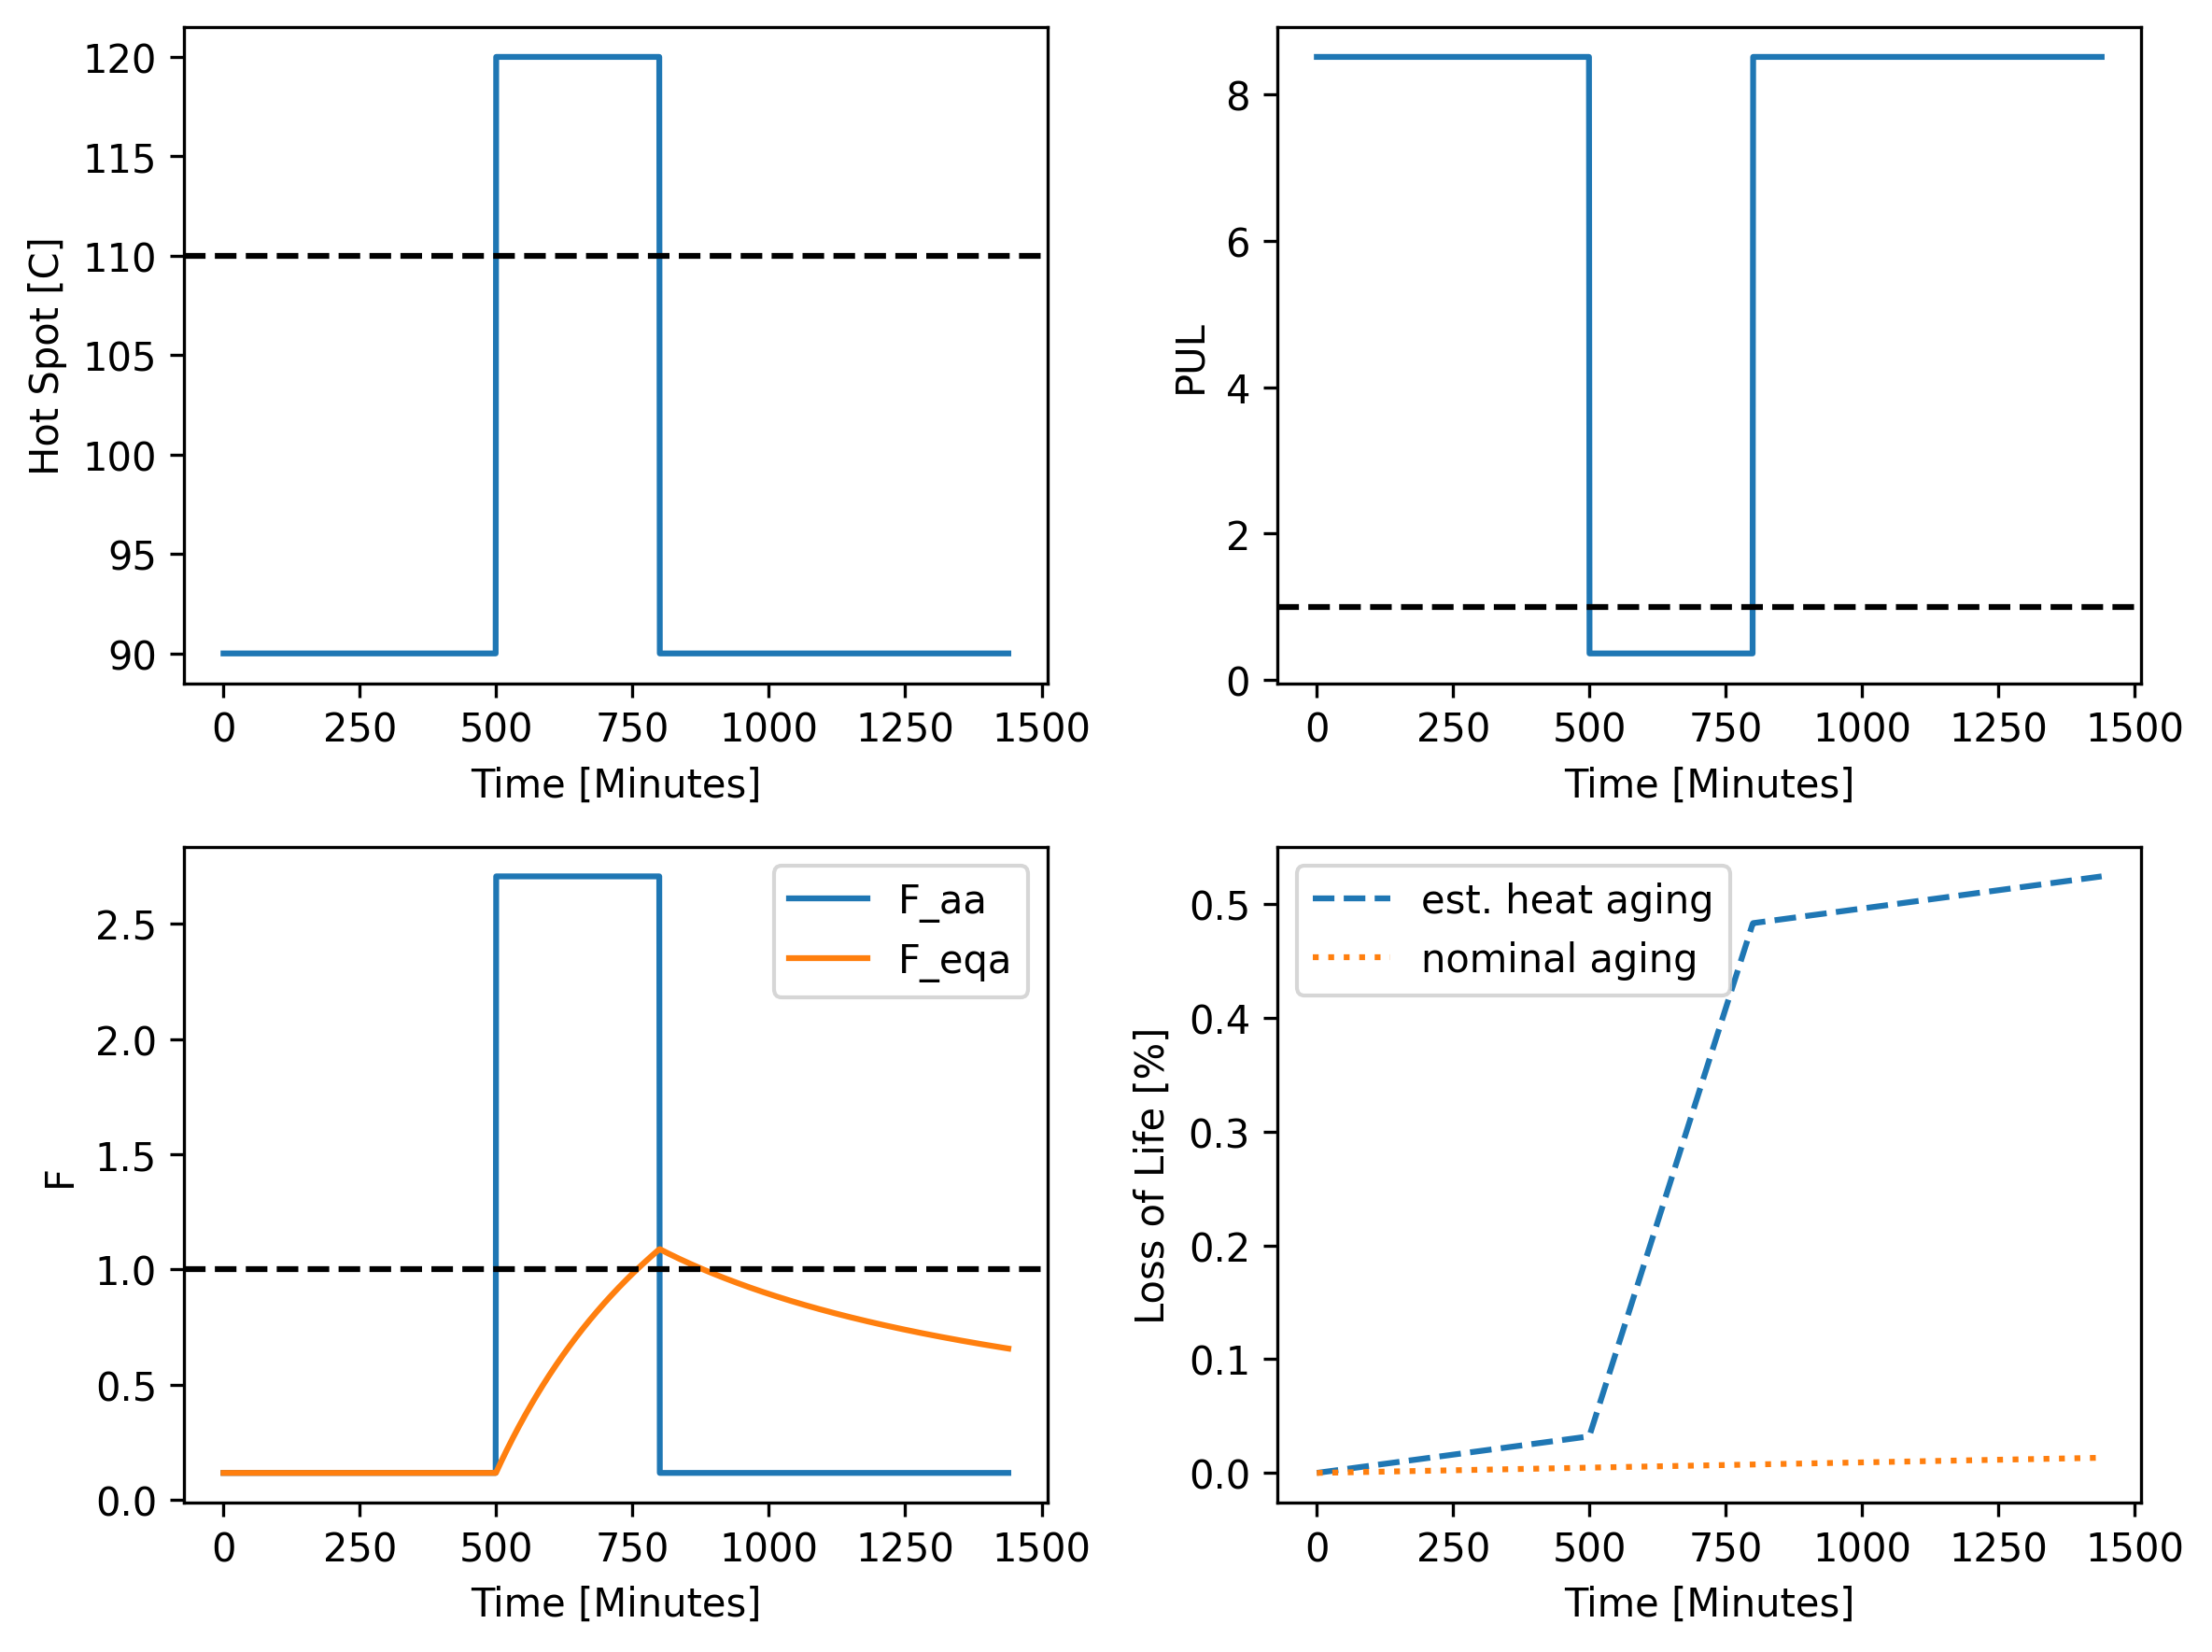

In [4]:
axs = plt.subplots(2,2,figsize=(8,6),dpi=300)
axs[1]

axs[1][0][0].plot(time,t_hs)
axs[1][0][0].axhline(110,color='k',ls='--')
axs[1][0][0].set_ylabel('Hot Spot [C]')
axs[1][0][0].set_xlabel('Time [Minutes]')

axs[1][0][1].plot(time,pul)
axs[1][0][1].axhline(1,color='k',ls='--')
axs[1][0][1].set_ylabel('PUL')
axs[1][0][1].set_xlabel('Time [Minutes]')

axs[1][1][0].plot(time,V,label='F_aa')
axs[1][1][0].plot(time,F_eqa,label='F_eqa')
axs[1][1][0].axhline(1,color='k',ls='--')
axs[1][1][0].set_ylabel(r'F')
axs[1][1][0].set_xlabel('Time [Minutes]')
axs[1][1][0].legend()

axs[1][1][1].plot(time,loss_of_life,'--',label='est. heat aging')
axs[1][1][1].plot(time,time/60/nominal_insulation_life*100,':',label='nominal aging')
axs[1][1][1].set_ylabel(r'Loss of Life [%]')
axs[1][1][1].set_xlabel('Time [Minutes]')
axs[1][1][1].legend()

plt.tight_layout()
plt.show()

In [19]:
# test for nominal aging at rated hot-spot temperature, loss of life should be 0.0133%

v,f1,f2,lol = estimate_loss_of_life(np.array([110,110]),np.array([24.*60.,24.*60.]),nominal_insulation_life=nominal_insulation_life)

cond = np.round(lol[-1],4) == 0.0133 
assert cond 
cond

estimated loss of life equal to 0.8


In [25]:
# test for nominal aging at rated hot-spot temperature

v,f1,f2,lol = estimate_loss_of_life(np.array([140,140]),np.array([10.5*60.,10.5*60.]),nominal_insulation_life=nominal_insulation_life)

cond = np.round(lol[-1],1) == 0.1
assert cond 
cond

Nominal aging at rated hot-spot temperature equal to 6.0


In [24]:
# test for nominal aging at rated hot-spot temperature

v,f1,f2,lol = estimate_loss_of_life(np.array([200,200]),np.array([0.42*60.,0.42*60.]),nominal_insulation_life=nominal_insulation_life)

cond = np.round(lol[-1],1) == 0.4
assert cond 
cond

Nominal aging at rated hot-spot temperature equal to 24.0


In [23]:
v,f1,f2,lol = estimate_loss_of_life(np.array([110,110]),np.array([24*60,24*60]))


In [11]:
v,f1,f2,lol2 = estimate_loss_of_life(np.array([95,95]),np.array([24*60,24*60]))

In [12]:
lol[-1]/lol2[-1]

4.9288394600053715